## Introduction

Pneumonia is an inflammatory disease that affects the air sacs withing the lungs. Typically the air sacs is filled up with fluid causing symptoms such as coughing, fever, and difficulty breathing. The disease is most commonly transmitted by airborne droplets. A hospital reach out to a team of data scientists, task with creating an accurate image classification neural network that will identify the patient's x-ray whether or not that person has pneumonia.

## Importing Libraries and Loading Images

### Libraries

In [1]:
#Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
from sklearn.model_selection import train_test_split
import keras
from keras import models
from keras import layers
from keras import optimizers
from keras.layers import Dense, Conv2D, Flatten
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import to_categorical
import os

### Load Images

In [2]:
#Directory path
train_data_dir = 'chest_xray/train/'
test_data_dir = 'chest_xray/test/'
val_data_dir = 'chest_xray/val/'

In [3]:
#Get all the data in each generator and reshaping the images
train_generator = ImageDataGenerator(rescale = 1./255).flow_from_directory(
        train_data_dir, 
        target_size=(128, 128), 
        color_mode = 'grayscale', 
        batch_size=200)

test_generator = ImageDataGenerator(rescale = 1./255).flow_from_directory(
        test_data_dir, 
        target_size=(128, 128), 
        color_mode = 'grayscale', 
        batch_size=200)

val_generator = ImageDataGenerator(rescale = 1./255).flow_from_directory(
        val_data_dir, 
        target_size=(128, 128), 
        color_mode = 'grayscale',
        batch_size=16)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [4]:
#Create the datasets
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)
val_images, val_labels = next(val_generator)

### Previewing Images

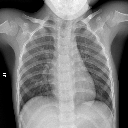

In [5]:
array_to_img(train_images[10])

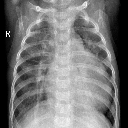

In [6]:
array_to_img(train_images[22])

## Images and Labels

### EDA of the Dataset

In [7]:
#Exploring the data set
train_ex = train_images.shape[0]
num_px = train_images.shape[1]
test_ex = test_images.shape[0]
val_ex = val_images.shape[0]

print ("Number of training samples: " + str(train_ex))
print ("Number of testing samples: " + str(test_ex))
print ("Number of validation samples: " + str(val_ex))
print ("train_images shape: " + str(train_images.shape))
print ("train_labels shape: " + str(train_labels.shape))
print ("test_images shape: " + str(test_images.shape))
print ("test_labels shape: " + str(test_labels.shape))
print ("val_images shape: " + str(val_images.shape))
print ("val_labels shape: " + str(val_labels.shape))

Number of training samples: 200
Number of testing samples: 200
Number of validation samples: 16
train_images shape: (200, 128, 128, 1)
train_labels shape: (200, 2)
test_images shape: (200, 128, 128, 1)
test_labels shape: (200, 2)
val_images shape: (16, 128, 128, 1)
val_labels shape: (16, 2)


### Images

In [8]:
#Reshaping the images
train_img = train_images.reshape(train_images.shape[0], -1)
test_img = test_images.reshape(test_images.shape[0], -1)
val_img = val_images.reshape(val_images.shape[0], -1)

In [9]:
#Previewing the shape of images
print('Train Images:',np.shape(train_img))
print('Test Images:',np.shape(test_img))
print('Validation Images:',np.shape(val_img))

Train Images: (200, 16384)
Test Images: (200, 16384)
Validation Images: (16, 16384)


### Labels

In [10]:
#Taking a look at the array of the train_labels
train_labels

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.

In [11]:
#Looking at the binary assignment of the cases
train_generator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [12]:
#Reshaping the labels
train_label = np.reshape(train_labels[:, 0], (200,1))
test_label = np.reshape(test_labels[:, 0], (200,1))
val_label = np.reshape(val_labels[:, 0], (16,1))

In [13]:
print('Train Labels:',np.shape(train_label))
print('Test Labels:',np.shape(test_label))
print('Validation Labels:',np.shape(val_label))

Train Labels: (200, 1)
Test Labels: (200, 1)
Validation Labels: (16, 1)


## Baseline Model

### Model

In [14]:
#Build a baseline fully connected model
np.random.seed(42)
model = models.Sequential()
model.add(layers.Dense(8, activation='relu', input_shape=(16384, )))
model.add(layers.Dense(1, activation='sigmoid'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 131080    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 131,089
Trainable params: 131,089
Non-trainable params: 0
_________________________________________________________________


In [16]:
#Creating a Compile
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [17]:
#Creating history to see the training process
history_bl = model.fit(train_img,
                    train_label,
                    epochs=100,
                    batch_size=80,
                    validation_data=(val_img, val_label))

Epoch 1/100
3/3 [==============================] - 0s 48ms/step - loss: 0.5653 - accuracy: 0.7550 - val_loss: 0.9140 - val_accuracy: 0.5000
Epoch 2/100
3/3 [==============================] - 0s 8ms/step - loss: 0.5111 - accuracy: 0.7900 - val_loss: 0.8677 - val_accuracy: 0.5000
Epoch 3/100
3/3 [==============================] - 0s 8ms/step - loss: 0.5021 - accuracy: 0.7900 - val_loss: 0.8984 - val_accuracy: 0.5000
Epoch 4/100
3/3 [==============================] - 0s 8ms/step - loss: 0.5124 - accuracy: 0.7900 - val_loss: 0.8390 - val_accuracy: 0.5000
Epoch 5/100
3/3 [==============================] - 0s 8ms/step - loss: 0.4973 - accuracy: 0.7900 - val_loss: 0.9047 - val_accuracy: 0.5000
Epoch 6/100
3/3 [==============================] - 0s 9ms/step - loss: 0.4926 - accuracy: 0.7900 - val_loss: 0.8898 - val_accuracy: 0.5000
Epoch 7/100
3/3 [==============================] - 0s 9ms/step - loss: 0.4904 - accuracy: 0.7900 - val_loss: 0.9224 - val_accuracy: 0.5000
Epoch 8/100
3/3 [=========

3/3 [==============================] - 0s 8ms/step - loss: 0.3066 - accuracy: 0.8900 - val_loss: 1.0100 - val_accuracy: 0.5000
Epoch 60/100
3/3 [==============================] - 0s 8ms/step - loss: 0.3049 - accuracy: 0.8700 - val_loss: 0.8386 - val_accuracy: 0.5625
Epoch 61/100
3/3 [==============================] - 0s 8ms/step - loss: 0.2821 - accuracy: 0.8750 - val_loss: 0.8164 - val_accuracy: 0.5625
Epoch 62/100
3/3 [==============================] - 0s 8ms/step - loss: 0.3326 - accuracy: 0.8800 - val_loss: 0.7373 - val_accuracy: 0.5625
Epoch 63/100
3/3 [==============================] - 0s 8ms/step - loss: 0.2978 - accuracy: 0.8800 - val_loss: 1.1872 - val_accuracy: 0.5000
Epoch 64/100
3/3 [==============================] - 0s 8ms/step - loss: 0.4127 - accuracy: 0.8300 - val_loss: 0.5807 - val_accuracy: 0.8125
Epoch 65/100
3/3 [==============================] - 0s 7ms/step - loss: 0.3086 - accuracy: 0.8950 - val_loss: 0.9304 - val_accuracy: 0.5625
Epoch 66/100
3/3 [===============

### Results

In [18]:
#Created a function for simple results of the model
def model_results(tr_img, tr_lab, te_img, te_lab):
    result_train = model.evaluate(tr_img, tr_lab)
    results_test = model.evaluate(te_img, te_lab)
    print(result_train)
    print(results_test)

In [19]:
#Created a function that will spit out graphs consistently for each models
def model_graphs(hist):
    acc = hist.history['accuracy']
    val_acc = hist.history['val_accuracy']
    loss = hist.history['loss']
    val_loss = hist.history['val_loss']
    epochs = range(len(acc))
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.figure()
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

In [20]:
model_results(train_img, train_label, test_img, test_label)

7/7 [==============================] - 0s 997us/step - loss: 0.6153 - accuracy: 0.6950
[0.2349928468465805, 0.9300000071525574]
[0.615324079990387, 0.6949999928474426]


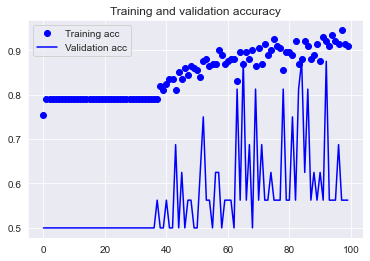

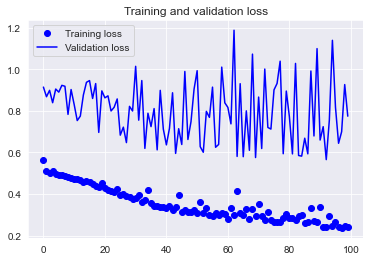

In [21]:
model_graphs(history_bl)

In [22]:
model.save('Chest_X-ray_baseline.h5')

## CNN

### Datagenerator

In [23]:
#Get all of the data into each generator and modify the images
train_regen = ImageDataGenerator(rescale=1./255)
test_regen = ImageDataGenerator(rescale=1./255)
val_regen = ImageDataGenerator(rescale=1./255)

In [24]:
train_generator = train_regen.flow_from_directory(train_data_dir,
                                                  target_size = (128, 128),
                                                  batch_size = 64,
                                                  color_mode = 'grayscale',
                                                  class_mode = 'binary')
                                                  
test_generator = test_regen.flow_from_directory(test_data_dir,
                                                target_size = (128, 128),
                                                batch_size = 6,
                                                color_mode = 'grayscale',
                                                class_mode = 'binary')

val_generator = val_regen.flow_from_directory(val_data_dir,
                                              target_size = (128, 128),
                                              batch_size = 4,
                                              color_mode = 'grayscale',
                                              class_mode = 'binary')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [25]:
#Creating new sets for CNN
X_train, y_train = next(train_generator)
X_test, y_test = next(test_generator)
X_val, y_val = next(val_generator)

### Model

In [26]:
#Build a baseline CNN model
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(128, 128, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 25088)            

In [28]:
#CNN compile
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

In [29]:
#CNN training generator
history_cnn = model.fit(train_generator, 
                    epochs = 40, 
                    validation_data=val_generator)

Epoch 1/40
82/82 [==============================] - 71s 870ms/step - loss: 0.4255 - accuracy: 0.8115 - val_loss: 0.7662 - val_accuracy: 0.6250
Epoch 2/40
82/82 [==============================] - 77s 939ms/step - loss: 0.2065 - accuracy: 0.9231 - val_loss: 0.4688 - val_accuracy: 0.7500
Epoch 3/40
82/82 [==============================] - 74s 900ms/step - loss: 0.1394 - accuracy: 0.9450 - val_loss: 0.9548 - val_accuracy: 0.5625
Epoch 4/40
82/82 [==============================] - 74s 899ms/step - loss: 0.1147 - accuracy: 0.9571 - val_loss: 0.2226 - val_accuracy: 0.9375
Epoch 5/40
82/82 [==============================] - 73s 892ms/step - loss: 0.1034 - accuracy: 0.9647 - val_loss: 0.2862 - val_accuracy: 0.8750
Epoch 6/40
82/82 [==============================] - 69s 840ms/step - loss: 0.0915 - accuracy: 0.9663 - val_loss: 0.7370 - val_accuracy: 0.6250
Epoch 7/40
82/82 [==============================] - 70s 848ms/step - loss: 0.0813 - accuracy: 0.9699 - val_loss: 0.2178 - val_accuracy: 0.9375

### Results

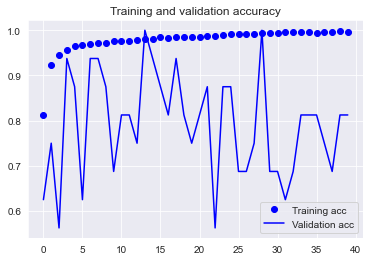

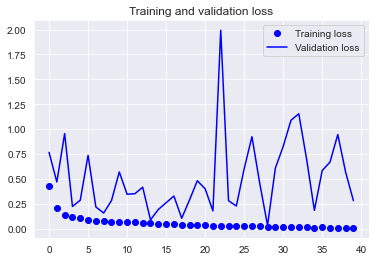

In [30]:
model_graphs(history_cnn)

In [31]:
model.save('Chest_X-ray_cnn.h5')

## CNN Weighted

### Class Imbalance

>Quick EDAs to see the severity of class imbalance

In [32]:
#Import library to filter out the warnings for quick EDAs
import warnings
warnings.filterwarnings("ignore")

In [33]:
#Checking to confirm the idenity of the binary labels
train_generator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [34]:
#Created a function to identify class imbalance
def imbalance_graphs(data_list):
    
    empty = []
    
    for i in data_list:
        if(i[1] == 0):
            empty.append("NORMAL")
        else:
            empty.append("PNEUMONIA")
    sns.countplot(empty);     

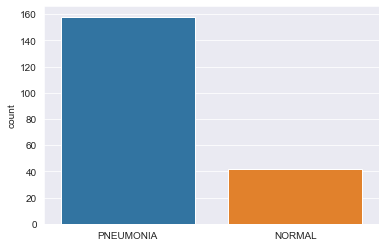

In [35]:
imbalance_graphs(train_labels)

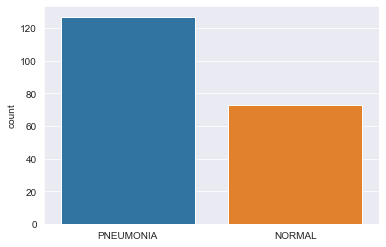

In [36]:
imbalance_graphs(test_labels)

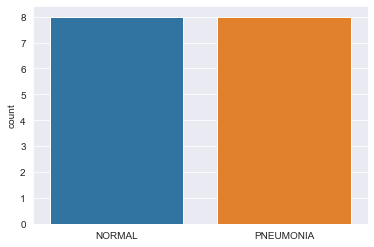

In [37]:
imbalance_graphs(val_labels)

As seen in the graphs above there is a severe class imbalance within the train data and the test data. Where the number of pneumonia images heavily out weigh the number of normal images. The validation set does not have a class imbalance. Weight parameter will be added to the model fit in the history section to bring to a closer class balance.

### Model

In [38]:
#Reusing the model layers from the previous CNN model
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(128, 128, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [39]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 126, 126, 32)      320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)            

In [40]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

In [41]:
#Adding the class_weight to the list of parameters to adjust for class imbalance
history_cnn_w = model.fit(train_generator, 
                    epochs = 40,
                    class_weight = {0: 3., 1: 1.},
                    validation_data=val_generator)

Epoch 1/40
82/82 [==============================] - 62s 760ms/step - loss: 0.7871 - accuracy: 0.7387 - val_loss: 0.4981 - val_accuracy: 0.6875
Epoch 2/40
82/82 [==============================] - 62s 753ms/step - loss: 0.3670 - accuracy: 0.9112 - val_loss: 0.3811 - val_accuracy: 0.8125
Epoch 3/40
82/82 [==============================] - 62s 754ms/step - loss: 0.2390 - accuracy: 0.9369 - val_loss: 0.3117 - val_accuracy: 0.8750
Epoch 4/40
82/82 [==============================] - 62s 755ms/step - loss: 0.2097 - accuracy: 0.9438 - val_loss: 0.2724 - val_accuracy: 0.8750
Epoch 5/40
82/82 [==============================] - 62s 757ms/step - loss: 0.1737 - accuracy: 0.9549 - val_loss: 0.3247 - val_accuracy: 0.8750
Epoch 6/40
82/82 [==============================] - 64s 782ms/step - loss: 0.1515 - accuracy: 0.9601 - val_loss: 0.4284 - val_accuracy: 0.6875
Epoch 7/40
82/82 [==============================] - 63s 766ms/step - loss: 0.1450 - accuracy: 0.9609 - val_loss: 0.2948 - val_accuracy: 0.8750

### Results

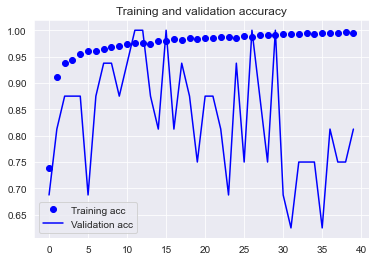

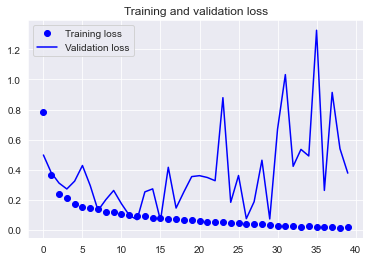

In [42]:
model_graphs(history_cnn_w)

In [43]:
model.save('Chest_X-ray_weighted_cnn.h5')

## CNN Final Model

### GridSearch

In [44]:
#Function for displaying grid search results
def display_cv_results(search_results):
    print('Best score = {:.4f} using {}'.format(search_results.best_score_, search_results.best_params_))
    means = search_results.cv_results_['mean_test_score']
    stds = search_results.cv_results_['std_test_score']
    params = search_results.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print('mean test accuracy +/- std = {:.4f} +/- {:.4f} with: {}'.format(mean, stdev, param))

In [45]:
#Function for an easy to use cnn model to create for grid search 
def cnn_model(pool_type='max', conv_activation='sigmoid', dropout_rate=0.10):
    model = models.Sequential()

    model.add(layers.Conv2D(32, (3, 3), activation='relu',
                            input_shape=(128, 128, 1)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])
    return (model)
#Makes cnn equal to the model 
cnn = cnn_model()
cnn.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 126, 126, 32)      320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 25088)            

In [46]:
#Makes our model from the funtion 
model = KerasClassifier(build_fn=cnn_model, verbose=1)

In [47]:
#Paramters for grid search of the model to go through 
#these can all be changed and modified depending on what we want to find
param_grid = {
    'pool_type': ['max', 'average'],
    'conv_activation': ['sigmoid', 'tanh', 'relu'],    
    'epochs': [10 , 7],
}

In [48]:
#Running the Gridsearch
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)

Epoch 1/10
2/2 [==============================] - 0s 152ms/step - loss: 0.7549 - accuracy: 0.6406
Epoch 2/10
2/2 [==============================] - 0s 153ms/step - loss: 0.6616 - accuracy: 0.6719
Epoch 3/10
2/2 [==============================] - 0s 158ms/step - loss: 0.6248 - accuracy: 0.6406
Epoch 4/10
2/2 [==============================] - 0s 155ms/step - loss: 0.6209 - accuracy: 0.6406
Epoch 5/10
2/2 [==============================] - 0s 155ms/step - loss: 0.6361 - accuracy: 0.5469
Epoch 6/10
2/2 [==============================] - 0s 154ms/step - loss: 0.6066 - accuracy: 0.7500
Epoch 7/10
2/2 [==============================] - 0s 157ms/step - loss: 0.5606 - accuracy: 0.6406
Epoch 8/10
2/2 [==============================] - 0s 157ms/step - loss: 0.5297 - accuracy: 0.8906
Epoch 9/10
2/2 [==============================] - 0s 157ms/step - loss: 0.5072 - accuracy: 0.7031
Epoch 10/10
2/2 [==============================] - 0s 157ms/step - loss: 0.6827 - accuracy: 0.4844


In [49]:
#Displays the best parameters found by the Gridsearch 
display_cv_results(grid_result)

Best score = 0.8153 using {'conv_activation': 'tanh', 'epochs': 10, 'pool_type': 'max'}
mean test accuracy +/- std = 0.6558 +/- 0.0611 with: {'conv_activation': 'sigmoid', 'epochs': 10, 'pool_type': 'max'}
mean test accuracy +/- std = 0.6566 +/- 0.0414 with: {'conv_activation': 'sigmoid', 'epochs': 10, 'pool_type': 'average'}
mean test accuracy +/- std = 0.6407 +/- 0.0584 with: {'conv_activation': 'sigmoid', 'epochs': 7, 'pool_type': 'max'}
mean test accuracy +/- std = 0.5887 +/- 0.2548 with: {'conv_activation': 'sigmoid', 'epochs': 7, 'pool_type': 'average'}
mean test accuracy +/- std = 0.8153 +/- 0.1324 with: {'conv_activation': 'tanh', 'epochs': 10, 'pool_type': 'max'}
mean test accuracy +/- std = 0.6407 +/- 0.0584 with: {'conv_activation': 'tanh', 'epochs': 10, 'pool_type': 'average'}
mean test accuracy +/- std = 0.6407 +/- 0.0584 with: {'conv_activation': 'tanh', 'epochs': 7, 'pool_type': 'max'}
mean test accuracy +/- std = 0.6566 +/- 0.0414 with: {'conv_activation': 'tanh', 'epoc

### Model

In [63]:
#Final CNN model taking in some GridSearch into an account
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(128, 128, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='tanh'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='tanh'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [64]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 126, 126, 32)      320       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 14, 14, 128)       0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 25088)            

In [65]:
#Compile
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

In [67]:
#Final model fit
history_cnn_final = model.fit(train_generator, 
                    epochs = 40,
                    class_weight = {0: 3., 1: 1.},
                    validation_data=val_generator)

Epoch 1/40
82/82 [==============================] - 64s 776ms/step - loss: 0.4303 - accuracy: 0.8779 - val_loss: 0.4646 - val_accuracy: 0.7500
Epoch 2/40
82/82 [==============================] - 68s 826ms/step - loss: 0.2270 - accuracy: 0.9404 - val_loss: 0.1930 - val_accuracy: 0.9375
Epoch 3/40
82/82 [==============================] - 79s 958ms/step - loss: 0.1806 - accuracy: 0.9530 - val_loss: 0.1635 - val_accuracy: 1.0000
Epoch 4/40
82/82 [==============================] - 89s 1s/step - loss: 0.1466 - accuracy: 0.9609 - val_loss: 0.1108 - val_accuracy: 1.0000
Epoch 5/40
82/82 [==============================] - 81s 989ms/step - loss: 0.1287 - accuracy: 0.9655 - val_loss: 0.3858 - val_accuracy: 0.8125
Epoch 6/40
82/82 [==============================] - 83s 1s/step - loss: 0.1097 - accuracy: 0.9705 - val_loss: 0.1029 - val_accuracy: 1.0000
Epoch 7/40
82/82 [==============================] - 89s 1s/step - loss: 0.0935 - accuracy: 0.9758 - val_loss: 0.0491 - val_accuracy: 1.0000
Epoch 8/

### Results

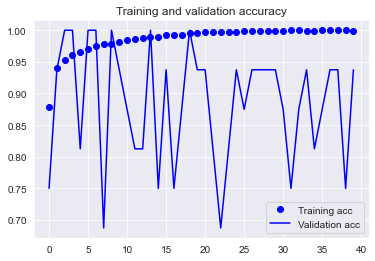

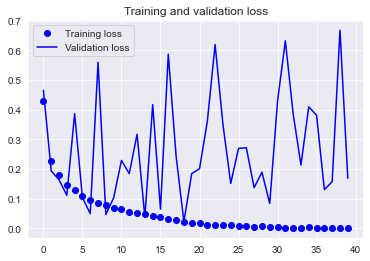

In [68]:
model_graphs(history_cnn_final)

In [76]:
model.save('Chest_X-ray_final_cnn.h5')

## Conclusion 

In the final model at epoch 20 we achieved a model accuracy of 0.9956 with a loss of 0.0191. Whereas the validation accuracy is 0.9375 with a validation loss of 0.1840. Anything further epochs leads to similar trend and greater chance of overfitting. 

## Play Testing

#### *Augmentation Generator Dataset (Unused)

Both the train set and test has a severe class imbalance so we will need to preform some data augmentation to create more normal images to match the number of pneumonia images. Whereas the validation set is equal so it will not need any adjustment.

In [51]:
# train_aug_gen = ImageDataGenerator(rescale=1./255, 
#                                    rotation_range=30, 
#                                    width_shift_range=0.3, 
#                                    height_shift_range=0.2, 
#                                    zoom_range=0.2, 
#                                    vertical_flip=True)

In [52]:
# test_aug_gen = ImageDataGenerator(rescale=1./255, 
#                                    rotation_range=30, 
#                                    width_shift_range=0.3, 
#                                    height_shift_range=0.2,  
#                                    zoom_range=0.2, 
#                                    vertical_flip=True)

In [53]:
# #Get all the data in each generator and reshaping the images
# train_generator = train_aug_gen.flow_from_directory(
#         train_data_dir, 
#         target_size=(128, 128), 
#         color_mode = 'grayscale', 
#         batch_size=500)

# test_generator = test_aug_gen.flow_from_directory(
#         test_data_dir, 
#         target_size=(128, 128), 
#         color_mode = 'grayscale', 
#         batch_size=6)

# val_generator = ImageDataGenerator(rescale = 1./255).flow_from_directory(
#         val_data_dir, 
#         target_size=(128, 128), 
#         color_mode = 'grayscale',
#         batch_size=4)

In [54]:
# train_images, train_labels = next(train_generator)
# test_images, test_labels = next(test_generator)
# val_images, val_labels = next(val_generator)

In [55]:
# imbalance_graphs(train_labels)

In [56]:
# imbalance_graphs(test_labels)

#### Model

In [57]:
# model = models.Sequential()
# model.add(layers.Conv2D(32, (3, 3), activation='relu',
#                         input_shape=(128, 128,  1)))
# model.add(layers.MaxPooling2D((2, 2)))

# model.add(layers.Conv2D(32, (4, 4), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))

# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))

# model.add(layers.Flatten())
# model.add(layers.Dense(64, activation='relu'))
# model.add(layers.Dense(1, activation='sigmoid'))

# model.compile(loss='binary_crossentropy',
#               optimizer= 'sgd',
#               metrics=['accuracy'])

In [58]:
# model.summary()

In [59]:
# history_da = model.fit(test_generator,
#                     epochs= 50, 
#                     class_weight = {0: 2., 1: 1.},
#                     validation_data=val_generator) 

#### Results

In [60]:
# model_results(X_train, y_train, X_test, y_test)

In [61]:
# model_graphs(history_da)